# An Improved Model For Predicting Property Tax Assessed Values

---

## Project Goals

Identify attributes that can be used to predict property tax assessed values, build a prediction model that is an improvement upon the existing model, and offer recommendations on what works or doesn't work.

---

## Project Description

The Zillow data science team would like to predict property tax assessed values for single family properties that had a transaction in 2017. A model already exists, but the Zillow data science team is hoping an outside perspective can lead to an improved model. We will analyze the data available and produce an improved prediction model. We will compare the new model to the existing one and offer recommendations on what works or doesn't work for acquiring the most accurate predictions.

---

## Initial Questions

Before beginning a few initial questions were formulated from an initial high level overview of the data available. Here are the questions that this project aimed to answer:

- What influence do bedroom count, bathroom count, and square footage have on property value?
- Is there a relationship between the age of a property and its value?
- Is there a relationship between the number of stories a property has and its value?
- Does a basement increase a property's value?
- Does a fireplace increase a property's value?
- Is there a relationship between heating or system type of a property and its value?
- Does location relate to a property's value?
- Does the total room count affect the value of a property?
- Is there a relationship between garage size and property value?
- Does a hot tub or pool increase a property's value?
- Is there a relationship between the size of a property's patio and its value?

---

## Importing the Required Modules

Everything we need to run the code blocks in this report are located in the util folder.
To run the code blocks in this report you will need numpy, pandas, matplotlib, seaborn and sklearn installed on your computer.

In [1]:
# Here we are importing everything needed to execute the code blocks in this notebook.
from util.acquire import wrangle_zillow
from util.prepare import scale_data, remove_outliers
from util.explore import *
from util.model import *

import warnings
warnings.filterwarnings("ignore")

---

## Data Acquisition and Preparation

The data is acquired from data.codeup.com using a SQL query. Acquiring the data takes some time so it is cached in a local "telco.csv" file for quicker access in the future. The "telco.csv" file is not stored in the Github repository.

Initial analysis of the data revealed a few things: the data has a lot of missing values, the column names are not very readable, some of the data points are unusual (i.e. the minimum square footage was 1 sq. ft.), and there are a lot of outliers skewing the distributions of values.

**Outliers:**
<br>
In the first pass of the pipeline the outliers in the columns that had the largest amount of outliers are removed in hopes that this would remove some of the unusual values in the data while also making the data more normally distributed.
    
**Missing Values:**
<br>
For a few columns with missing values it was possible to assume what the missing values represented. For instance, the only value in the pool_count column was 1 (meaning the property has 1 pool) so it was reasonable to assume the missing values represented no pool, or 0. The same was true for hot tub, fireplace, and basement.

For other columns with missing values a similar assumption could not be made. These columns had too many missing values so they were removed from the dataset.

Finally, the target variable had a few missing values (8 properties were missing this value). Since this column was only missing a small number of values it was decided that the rows missing this value could be removed without affecting our results.

**Renaming Columns:**
<br>
Lastly, the columns were renamed to improve the readability of the dataset and make some of the more ambiguous column names more descriptive.

In [2]:
# Here we will acquire, prepare, and split the zillow property data and store the results in our train, validate, 
# and test dataframes. Details can be found in the acquire.py file in the util directory.
train, validate, test = wrangle_zillow()

---

## Exploratory Analysis

With the data prepared and split we 

### Visualizations

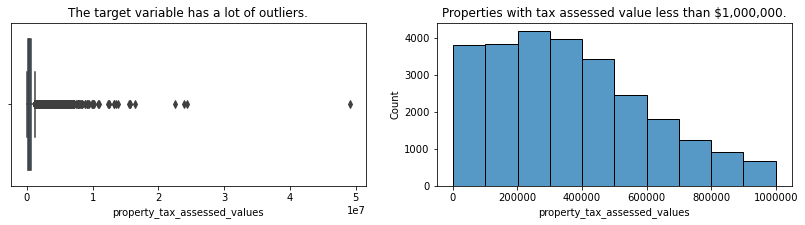

In [3]:
plot_property_value_distribution(train)

In [ ]:
plot_primary_features_vs_target(train)

In [ ]:
plot_quality_and_age(train)

In [ ]:
plot_amenities_and_location(train)

### Hypothesis Testing

In [ ]:
statistical_tests(train, 'square_feet')

In [ ]:
statistical_tests(train, 'bedroom_count')

In [ ]:
statistical_tests(train, 'bathroom_count')

In [ ]:
statistical_tests(train, 'amenities')

---

## Modeling

In [ ]:
train, validate, test = scale_data(
    train,
    validate,
    test,
    train.drop(columns = 'property_tax_assessed_values').columns
)

train = remove_outliers(
    train,
    1.5,
    ['property_tax_assessed_values', 'bedroom_count', 'bathroom_count']
)

In [ ]:
X_train = train.drop(columns = 'property_tax_assessed_values')
y_train = train.property_tax_assessed_values

X_validate = validate.drop(columns = 'property_tax_assessed_values')
y_validate = validate.property_tax_assessed_values

X_test = test.drop(columns = 'property_tax_assessed_values')
y_test = test.property_tax_assessed_values

In [ ]:
results = produce_models(X_train, y_train, X_validate, y_validate)
pd.DataFrame(results).T

Model_1: A polynomial regression model using features square_feet, bedroom_count, and bathroom_count.
<br>
Model_2: A polynomial regression model using features square_feet, bedroom_count, bathroom_count, and amenities.

In [ ]:
results = produce_models_for_each_county(train, validate)
pd.DataFrame(results).T

---

## Key Takeaways and Recommendations

Including the total amenities in the model increases the model's performance. Additionally, the property age and building quality features also have the potential to improve the model's performance. Building separate models for each county provides significantly improved performance for Orange and Ventura counties.

---

## Next Steps

Given time I would like to try building separate models for non-outlier and outlier properties. I believe the outliers weigh down the model's performance on the overall dataset and we may benefit from having separate models depending on whether a home is ordinary or extraordinary. Additionally, I would like to try building models with various combinations of features to see if a different set of features could provide better predictions.